# Multiple Linear Regression

Simple linear regression is extended to multiple linear regression by including more than one predictor variable.  The notation makes it seem worse than it is.  Maybe.

Simple linear regression attempts to predict a response variable $y$ with a line

$$\hat{y}_n = \hat{\beta}_0 + \hat{\beta}_1 * x_n$$

Recall, the hat on $y$ says that we are predicting the value of $y$ with this model, not that we actually expect a new value of $y$ to fall exactly on this line. We don't. Or at least we shouldn't.  

To add more predictors, simply add them on to the right hand side of this equation.  It helps, in the long run, to also index the predictors.

$$ \hat{y}_n = \hat{\beta}_0 + \hat{\beta}_1 * x_{n, 1} + \hat{\beta}_2 * x_{n, 2} + ...$$

You might ask, how many predictors can we add?  For now, strictly less than the number of observations you have.

Let's tighten up the notation.  Say we have $N$ observations and $J < N$ predictors.  Then multiple linear regression attempts to predict a response variable $y$ with the model (technically a hyper-plane)

$$\hat{y}_n = \beta_0 + \beta_1 x_{n,1} + \ldots + \beta_J x_{n,J} = \beta_0 + \sum_{j=1}^J \beta_j x_{n,j}$$

In the wild, you might see this model written using matrix multiplication as

$$\hat{y} = X \beta$$

If you've never heard of matrix multiplication before, worry not.  Simply think of the token/1-gram $X\beta$ as a short hand for the version you prefer above.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/roualdes/data/master/hospital.csv")
df.head()

stay   age  infection_risk   xray  beds  region  nurses
0   7.13  55.7             4.1   39.6   279       4     241
1   8.82  58.2             1.6   51.7    80       2      52
2   8.34  56.9             2.7   74.0   107       3      54
3   8.95  53.7             5.6  122.8   147       4     148
4  11.20  56.5             5.7   88.9   180       1     151

In [4]:
plt.scatter(df["beds"], df["infection_risk"]);
plt.xlabel("Number of beds in the hospital");
plt.ylabel("Infection risk rating");

## Multiple Different Predictors

In [5]:
N = np.shape(df)[0]
Xdf = df.iloc[:, [0,1,3,4,6]]
X = Xdf.to_numpy()
y = df.loc[:, "infection_risk"]

In [6]:
fit = LinearRegression().fit(X, y)

In [7]:
fit.intercept_

0.5061286547826747

In [8]:
fit.coef_

array([ 0.25520398, -0.01168115,  0.02009491, -0.00122535,  0.00390735])

In [9]:
data = {
    "X": np.c_[X],
    "y": y,
}
def loss(theta, data):
    Xb = theta[0] + data["X"] @ theta[1:]
    return np.sum((data["y"] - Xb) ** 2)

In [10]:
minimize(loss, np.zeros(6),
         args = (data),
         method = "L-BFGS-B")

      fun: 116.38319300270939
 hess_inv: <6x6 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.000108  ,  0.00146798,  0.0073598 ,  0.02059295, -0.06301946,
       -0.01153495])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 350
      nit: 41
     njev: 50
   status: 0
  success: True
        x: array([ 0.50614896,  0.25520648, -0.01168173,  0.02009485, -0.00122543,
        0.00390742])

In [11]:
mns = df.aggregate(np.mean)
mns

stay                9.648319
age                53.231858
infection_risk      4.354867
xray               81.628319
beds              252.168142
region              2.362832
nurses            173.247788
dtype: float64

In [12]:
fit.predict(np.asarray([[2, 50, 100, 100, 173]]))

array([2.99540594])

In [13]:
fit.predict(np.asarray([[2, 50, 100, 100, 173],
                        [2, 30, 100, 100, 173]]))

array([2.99540594, 3.22902894])

## Linear Wat?

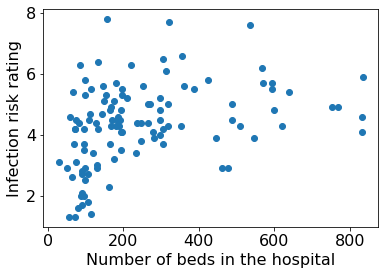

In [14]:
plt.scatter(df["beds"], df["infection_risk"]);
plt.xlabel("Number of beds in the hospital");
plt.ylabel("Infection risk rating");

In [22]:
N = np.shape(df)[0]
x = df["beds"].to_numpy()
o = np.argsort(x)
x = x[o]
X = np.c_[x, x**2]
y = df.loc[o, "infection_risk"]

In [24]:
fit = LinearRegression().fit(X, y)
yhat = fit.predict(X)

In [25]:
fit.coef_

array([ 9.22114959e-03, -8.77811596e-06])

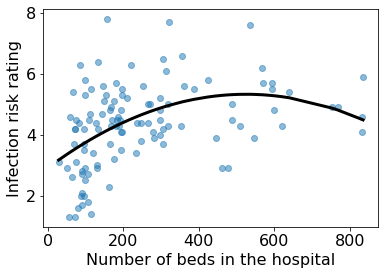

In [26]:
plt.scatter(x, y, alpha = 0.5);
plt.plot(x, yhat, c = "black", linewidth = 3);
plt.xlabel("Number of beds in the hospital");
plt.ylabel("Infection risk rating");